In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
data = pd.read_csv("Mall_Customers.csv")

In [21]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
data.shape

(200, 5)

In [23]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
data.duplicated().sum()

0

In [27]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [28]:
K = 6

In [29]:
kmeans = KMeans(n_clusters=K, random_state=42)

In [30]:
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

In [31]:
labels = kmeans.labels_

In [32]:
centroids = kmeans.cluster_centers_

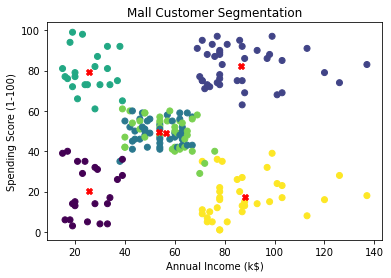

In [34]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels)
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', marker='X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customer Segmentation')
plt.show()

C:\Users\Public\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


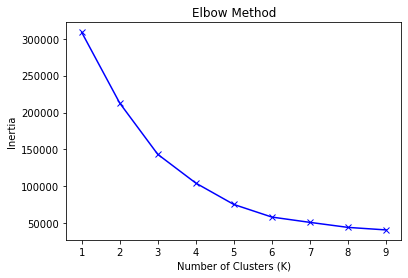

In [35]:
inertias = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(K_range, inertias, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

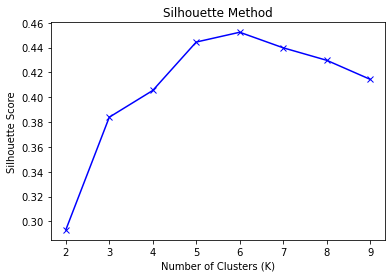

In [36]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different K values
silhouette_scores = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the silhouette scores
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()
